# Exploring Behavioral Insights from Smartphone Usage Data

In [96]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization

# Load the dataset from a CSV file
data = pd.read_csv(r"C:\Users\balu T\Downloads\mobile_usage_behavioral_analysis.csv")

# Display information about the DataFrame, including data types and non-null counts
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.3+ KB


##### The output details a dataset for mobile usage analysis with 1000 entries and 10 columns. It includes user demographics like Age and Gender, and key metrics such as Total_App_Usage_Hours and Daily_Screen_Time_Hours. The Location column enables exploration of geographical trends. With no missing values, the dataset is well-suited for uncovering trends in mobile app usage.

In [106]:
data.describe(include='all')       # The 'include='all'' parameter ensures that statistics for all columns.

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
count,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,New York
freq,NaN,NaN,517,NaN,NaN,NaN,NaN,NaN,NaN,243
mean,500.500000,38.745000,NaN,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410,NaN
std,288.819436,12.186734,NaN,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362,NaN
min,1.000000,18.000000,NaN,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000,NaN
25%,250.750000,28.000000,NaN,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000,NaN
50%,500.500000,40.000000,NaN,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000,NaN
75%,750.250000,50.000000,NaN,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500,NaN


In [108]:
# Calculate the first (Q1) and third (Q3) quartiles for the 'Age' column
Q1 = data['Age'].quantile(0.25)  # 25th percentile
Q3 = data['Age'].quantile(0.75)  # 75th percentile

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1  # IQR measures the spread of the middle 50% of the data

# Calculate lower and upper bounds for outlier detection
lower_bound = Q1 - IQR * 1.5  # Any data point below this is considered an outlier
upper_bound = Q3 + IQR * 1.5  # Any data point above this is considered an outlier

# Identify outliers in the 'Age' column
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]

# Print the outliers found in the dataset
print(outliers)


Empty DataFrame
Columns: [User_ID, Age, Gender, Total_App_Usage_Hours, Daily_Screen_Time_Hours, Number_of_Apps_Used, Social_Media_Usage_Hours, Productivity_App_Usage_Hours, Gaming_App_Usage_Hours, Location]
Index: []


##### The output indicates that the outliers DataFrame is empty, meaning that there are no outlier values detected in the 'Age' column of the dataset. This conclusion is drawn based on the Interquartile Range (IQR) method applied to the age data.

In [116]:
data.sample(10)     # Randomly select and display 10 samples from the DataFrame

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
389,390,36,Male,7.23,1.47,13,2.39,3.90,2.75,New York
114,115,52,Female,3.58,7.84,27,2.65,4.08,2.43,Chicago
29,30,33,Female,11.29,4.61,14,4.89,0.98,2.09,New York
899,900,19,Male,11.91,11.22,28,1.46,0.54,1.58,New York
773,774,58,Male,7.74,1.96,22,2.74,4.29,1.60,Los Angeles
692,693,49,Female,11.78,6.66,7,2.05,3.25,4.60,New York
326,327,48,Female,5.04,4.53,28,0.53,4.74,2.48,Houston
717,718,55,Male,2.44,13.38,3,3.92,1.58,2.98,Phoenix
583,584,45,Male,9.23,13.43,29,0.79,4.29,0.35,Los Angeles
431,432,40,Female,1.00,3.36,8,0.89,2.26,4.67,Houston


In [118]:
print(data['Gender'].value_counts())   # Count and display the number of occurrences of each gender in the 'Gender' column

print(data['Location'].value_counts())# Count and display the number of occurrences of each location in the 'Location' column


Gender
Male      517
Female    483
Name: count, dtype: int64
Location
New York       243
Phoenix        199
Chicago        192
Los Angeles    185
Houston        181
Name: count, dtype: int64


In [120]:
data['Age'].agg(['min','max','mean'])        # Calculate and display the minimum, maximum, and mean age from the 'Age' column

min     18.000
max     59.000
mean    38.745
Name: Age, dtype: float64

In [49]:
skewness_age = data['Age'].skew()                # Calculate skewness for the 'Age' column

print("Skewness of Age:", skewness_age)


Skewness of Age: -0.08945884446581134
Skewness of Total App Usage Hours: 0.024755242637052692


##### The skewness value of -0.089 for the 'Age' column indicates a slight leftward skew, suggesting a nearly symmetrical distribution with a minor tendency towards younger ages. This balance enhances the reliability of analyses related to user behavior across age groups.





In [126]:
# Define age bins and corresponding labels for grouping
age_bins = [18, 25, 35, 45, 55, 65]  # Age ranges
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']  # Labels for each bin

# Create a new column 'Age_Group' by binning the 'Age' column
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a pivot table to summarize app usage by age group and gender
pivot_table = data.pivot_table(
    index='Age_Group',  # Group the data by age bins
    columns='Gender',  # Separate the data by gender
    values=['Total_App_Usage_Hours', 'Daily_Screen_Time_Hours', 
            'Number_of_Apps_Used', 'Social_Media_Usage_Hours', 
            'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours'],
    aggfunc={
        'Number_of_Apps_Used': 'count',  # Count the number of apps used
        'Total_App_Usage_Hours': 'sum',  # Sum total app usage hours
        'Daily_Screen_Time_Hours': 'sum',  # Sum daily screen time hours
        'Social_Media_Usage_Hours': 'sum',  # Sum social media usage hours
        'Productivity_App_Usage_Hours': 'sum',  # Sum productivity app usage hours
        'Gaming_App_Usage_Hours': 'sum'  # Sum gaming app usage hours
    },
    observed=False  # Prevent future warnings
)

# Display the resulting pivot table
pivot_table


Daily_Screen_Time_Hours         Gaming_App_Usage_Hours          \
Gender                     Female    Male                 Female    Male   
Age_Group                                                                  
18-25                      600.92  758.99                 208.43  201.80   
26-35                      782.78  919.92                 241.95  317.44   
36-45                      833.05  940.72                 283.18  321.25   
46-55                     1076.49  947.33                 330.75  280.39   
56-65                      393.24  442.87                 136.84  153.38   

          Number_of_Apps_Used      Productivity_App_Usage_Hours          \
Gender                 Female Male                       Female    Male   
Age_Group                                                                 
18-25                      79   90                       191.89  223.30   
26-35                     102  123                       232.10  300.63   
36-45                     105  127                       282.39  342.75   
46-55                     145  120                       357.14  307.73   
56-65                      52   57                       127.92  129.42   

          Social_Media_Usage_Hours         Total_App_Usage_Hours          
Gender                      Female    Male                Female    Male  
Age_Group                                                                 
18-25                       209.88  223.50                501.25  606.98  
26-35                       267.20  290.93                651.65  755.02  
36-45                       247.33  275.61                668.37  816.96  
46-55                       352.29  306.75                939.33  766.48  
56-65                       140.33  142.51                324.83  374.80

##### The app usage data provides insights into user engagement across different age groups and genders. It reveals that the 46-55 age group has the highest overall app usage, while the 56-65 age group shows the least engagement. Younger users, particularly females, are more active on social media, whereas males tend to prefer gaming apps. Additionally, productivity app usage peaks in the middle-aged demographic. Overall, these trends highlight distinct preferences and behaviors, which can inform targeted marketing and app development strategies.





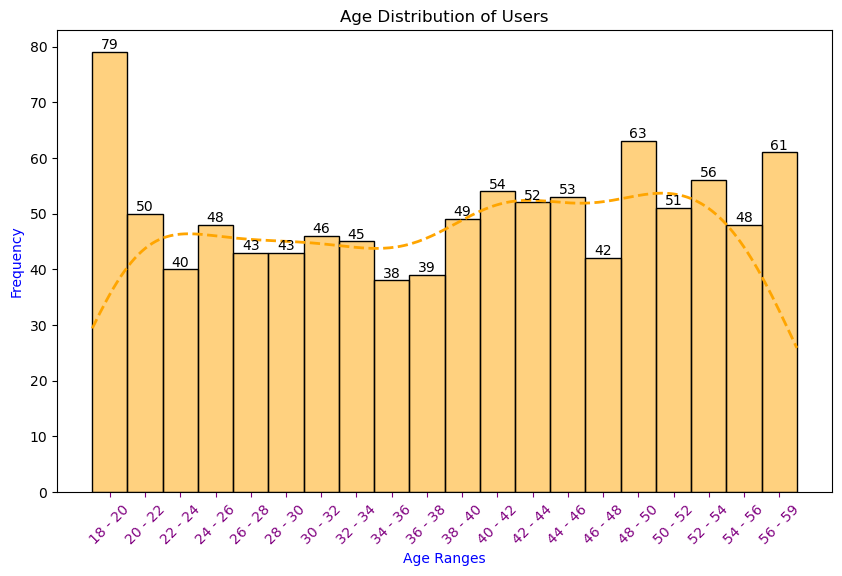

In [140]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the histogram with KDE
hist_plot = sns.histplot(data['Age'], bins=20, kde=True, color='orange', 
                         line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2})

# Adding the values on top of each bar
for patch in hist_plot.patches:
    height = patch.get_height()
    x = patch.get_x() + patch.get_width() / 2
    plt.annotate(f'{int(height)}', (x, height), ha='center', va='bottom')

# Get bin edges for x-ticks
bin_edges = hist_plot.patches[0].get_x() + hist_plot.patches[0].get_width() * np.arange(len(hist_plot.patches) + 1)

# Create age range labels
age_ranges = [f'{int(bin_edges[i])} - {int(bin_edges[i + 1])}' for i in range(len(bin_edges) - 1)]

# Set x-ticks and labels
plt.xticks(ticks=bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) / 2, labels=age_ranges, rotation=45, color='purple')

# Change x-tick color and x-label color
plt.tick_params(axis='x', colors='purple')  # Change x-tick color
plt.xlabel('Age Ranges', color='blue')  # Change x-label color

# Set the title and y-label
plt.title('Age Distribution of Users')
plt.ylabel('Frequency', color='blue')

# Show the plot
plt.show()


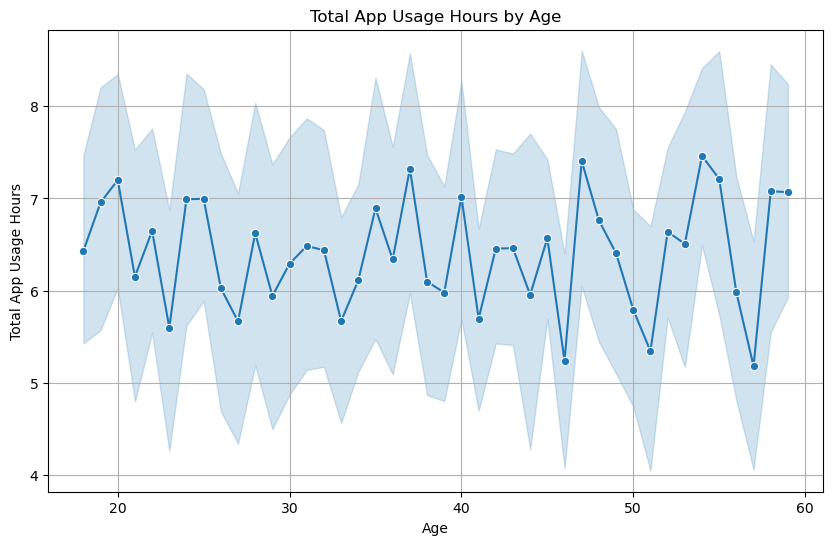

In [164]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a line plot for Total App Usage Hours by Age
sns.lineplot(x='Age', y='Total_App_Usage_Hours', data=data, marker='o')

# Set the title and labels
plt.title('Total App Usage Hours by Age')
plt.xlabel('Age')
plt.ylabel('Total App Usage Hours')

# Add grid for better readability
plt.grid()

# Show the plot
plt.show()


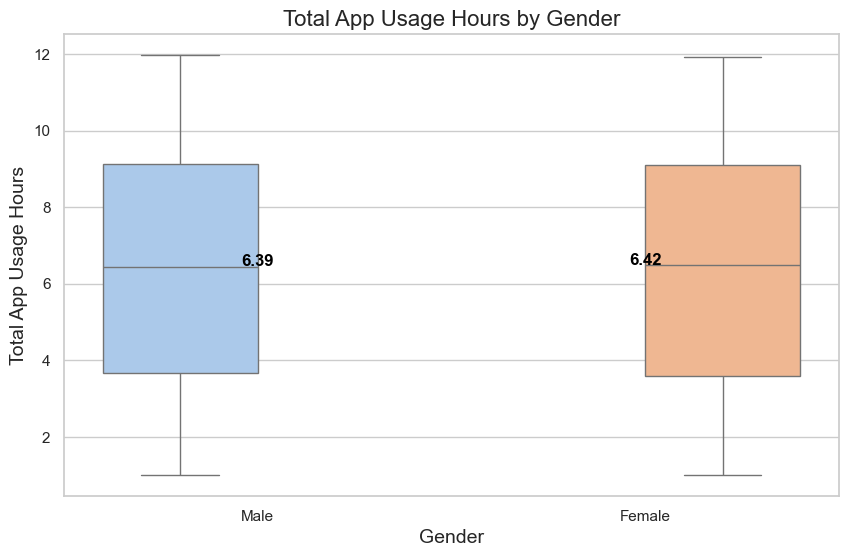

In [190]:

# Set the style for the plot
sns.set(style='whitegrid')

# Boxplot for Total App Usage by Gender
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='Gender', y='Total_App_Usage_Hours', data=data, hue='Gender', palette='pastel', dodge=True)

# Calculate the mean values for each gender
means = data.groupby('Gender')['Total_App_Usage_Hours'].mean()

# Annotate the mean values on the box plot
for i, gender in enumerate(means.index):
    plt.text(i, means[gender], f'{means[gender]:.2f}', 
             horizontalalignment='center', 
             color='black', 
             weight='semibold', 
             fontsize=12, 
             va='bottom')  # Vertical alignment for better positioning

# Set plot titles and labels
plt.title('Total App Usage Hours by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Total App Usage Hours', fontsize=14)

# Show the plot
plt.show()


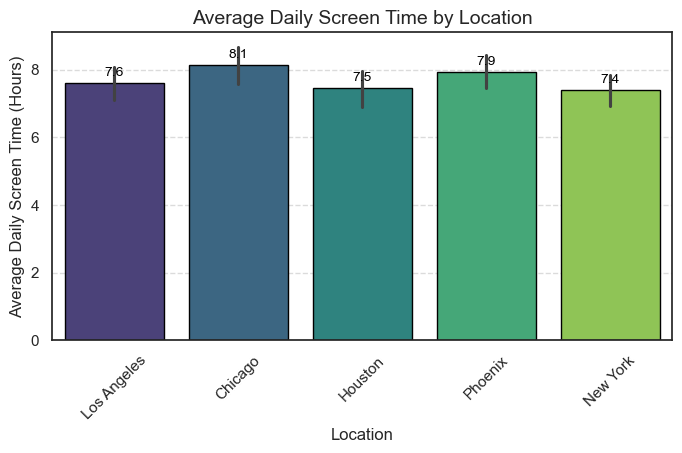

In [176]:
# Set the figure size
plt.figure(figsize=(8, 4))

# Create the bar plot with 'hue' set to 'Location'
bar_plot = sns.barplot(
    x='Location', 
    y='Daily_Screen_Time_Hours', 
    data=data, 
    estimator='mean', 
    hue='Location',  # Assign 'Location' to hue for color distinction
    palette='viridis',  # Use a color palette for the bars
    edgecolor='black'
)

# Set the title and labels
plt.title('Average Daily Screen Time by Location', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Average Daily Screen Time (Hours)')

# Add values on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='baseline', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


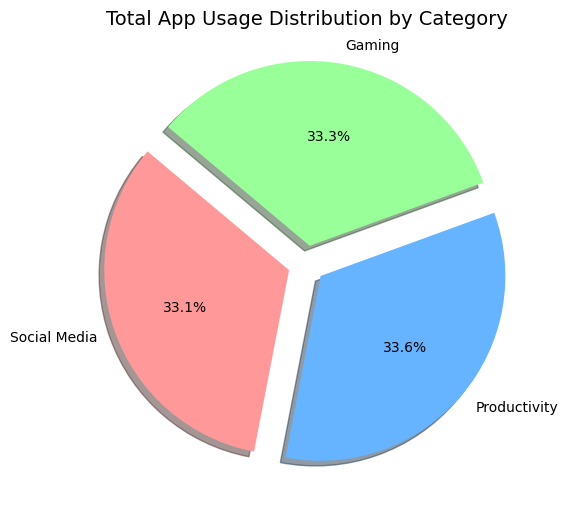

In [168]:
# Calculate total usage hours for each category
usage_data = [
    data['Social_Media_Usage_Hours'].sum(),
    data['Productivity_App_Usage_Hours'].sum(),
    data['Gaming_App_Usage_Hours'].sum()
]
categories = ['Social Media', 'Productivity', 'Gaming']

# Define colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Custom colors for each category

# Set up the figure
plt.figure(figsize=(6, 6))

# Create the pie chart with enhancements
plt.pie(
    usage_data, 
    labels=categories, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=(0.1, 0.1, 0.1),  # Slightly separate each slice
    shadow=True  # Add shadow for a 3D effect
)

# Set the title with a larger font size
plt.title('Total App Usage Distribution by Category', fontsize=14)

# Display the plot
plt.show()


User_ID                            int64
Age                                int64
Gender                            object
Total_App_Usage_Hours            float64
Daily_Screen_Time_Hours          float64
Number_of_Apps_Used                int64
Social_Media_Usage_Hours         float64
Productivity_App_Usage_Hours     float64
Gaming_App_Usage_Hours           float64
Location                          object
Age_Group                       category
dtype: object


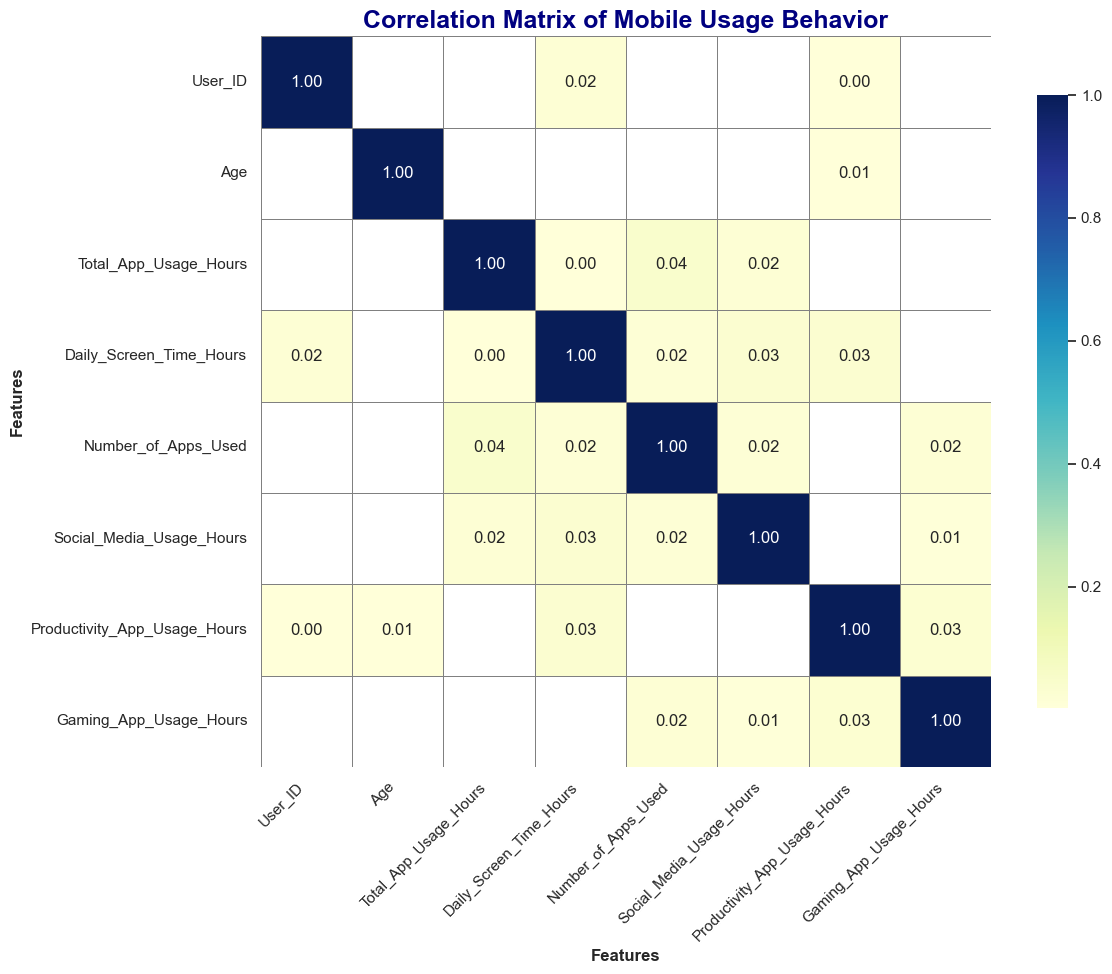

In [178]:
# 1. Check the DataFrame to identify non-numeric columns
print(data.dtypes)

# 2. Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 3. Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# 4. Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))  # Increase figure size for better visibility
sns.set(style='white')  # Set the background style

# Create the heatmap with enhancements
heatmap = sns.heatmap(correlation_matrix, 
                       annot=True,           # Annotate cells with correlation values
                       fmt=".2f",           # Format of the annotation
                       cmap='YlGnBu',       # Use a vibrant color map
                       square=True,         # Make cells square-shaped
                       linewidths=0.5,      # Add lines between cells
                       linecolor='gray',    # Color of the lines
                       cbar_kws={"shrink": .8},  # Adjust color bar size
                       mask=(correlation_matrix < 0).astype(bool)  # Mask negative correlations
                      )

# Set the title and labels with enhanced formatting
plt.title('Correlation Matrix of Mobile Usage Behavior', fontsize=18, weight='bold', color='navy')
plt.xlabel('Features', fontsize=12, weight='bold')
plt.ylabel('Features', fontsize=12, weight='bold')

# Improve the layout
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Keep y labels horizontal

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()



In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = data[['Age']]  # Features
y = data['Total_App_Usage_Hours']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
def predict_usage_hours(age):
    # Create a DataFrame with the same column name as the training data
    input_data = pd.DataFrame({'Age': [age]})
    return model.predict(input_data)[0]

# Example usage
age_input = 25  # Replace with the age you want to predict
predicted_hours = predict_usage_hours(age_input)
print(f'Predicted Total App Usage Hours for Age {age_input}: {predicted_hours}')





Mean Squared Error: 9.555809511451173
R² Score: -0.00103012111607792
Predicted Total App Usage Hours for Age 25: 6.394803874212146


In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = data[['Age']]  # Features (input)
y = data['Total_App_Usage_Hours']  # Target variable (output)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')



Mean Squared Error: 9.56
R² Score: -0.00


In [202]:
def predict_usage_hours(age):
    """
    Predict total app usage hours based on age.
    
    Parameters:
    age (int): The age for which to predict usage hours.
    
    Returns:
    float: Predicted total app usage hours.
    """
    # Create a DataFrame with the same column name as the training data
    input_data = pd.DataFrame({'Age': [age]})
    return model.predict(input_data)[0]

# Example usage
age_input = int(input("enter the age please"))  # Replace with the age you want to predict
predicted_hours = predict_usage_hours(age_input)
print(f'Predicted Total App Usage Hours for Age {age_input}: {predicted_hours:.2f} hours')


enter the age please 45


Predicted Total App Usage Hours for Age 45: 6.38 hours
